## Train ReLayNet
RunFile of OCT segmentation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

from networks.relay_net import ReLayNet
from networks.data_utils import get_imdb_data

#torch.set_default_tensor_type('torch.FloatTensor')

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


In [2]:
train_data, test_data = get_imdb_data()
print("Train size: %i" % len(train_data))
print("Test size: %i" % len(test_data))

Train size: 88
Test size: 22


In [3]:
train_data.y.max()

8.0

In [4]:
from networks.relay_net import ReLayNet
from networks.solver import Solver

train_loader = torch.utils.data.DataLoader(train_data, batch_size=4, shuffle=True, num_workers=4)
val_loader = torch.utils.data.DataLoader(test_data, batch_size=4, shuffle=False, num_workers=4)

param ={
        'num_channels':1,
        'num_filters':64,
        'kernel_h':3,
        'kernel_w':7,
        'kernel_c': 1,
        'stride_conv':1,
        'pool':2,
        'stride_pool':2,
        'num_class':9
    }

exp_dir_name = 'Exp01'

relaynet_model = ReLayNet(param)
solver = Solver(optim_args={"lr": 1e-2})
solver.train(relaynet_model, train_loader, val_loader, log_nth=1, num_epochs=20, exp_dir_name=exp_dir_name)


START TRAIN.
[Iteration : 0/20] : 5.347818374633789
[Iteration : 0/20] : 5.1942057609558105
[Iteration : 0/20] : 4.655634880065918
[Iteration : 0/20] : 4.005857467651367
[Iteration : 0/20] : 3.973095417022705
[Iteration : 0/20] : 3.8660225868225098
[Iteration : 0/20] : 3.345628261566162
[Iteration : 0/20] : 3.0158441066741943
[Iteration : 0/20] : 2.6356801986694336
[Iteration : 0/20] : 2.591153383255005
[Iteration : 0/20] : 2.2548017501831055
[Iteration : 0/20] : 2.1181068420410156
[Iteration : 0/20] : 2.411038398742676
[Iteration : 0/20] : 2.0774805545806885
[Iteration : 0/20] : 1.8935654163360596
[Iteration : 0/20] : 2.2032620906829834
[Iteration : 0/20] : 2.631779670715332
[Iteration : 0/20] : 2.172875165939331
[Iteration : 0/20] : 1.8873226642608643
[Iteration : 0/20] : 1.8699941635131836
[Iteration : 0/20] : 1.8484838008880615
[Iteration : 0/20] : 2.4885032176971436
[Epoch : 0/20] : 2.4885032176971436
Saving model... models/Exp01/relaynet_epoch1.model
[Iteration : 0/20] : 1.750215

[Iteration : 0/20] : 0.9410866498947144
[Iteration : 0/20] : 1.2216428518295288
[Iteration : 0/20] : 1.0823309421539307
[Iteration : 0/20] : 1.108840823173523
[Iteration : 0/20] : 1.243131160736084
[Iteration : 0/20] : 1.104687213897705
[Iteration : 0/20] : 1.237828254699707
[Iteration : 0/20] : 1.0020571947097778
[Iteration : 0/20] : 0.9327605962753296
[Epoch : 8/20] : 0.9327605962753296
Saving model... models/Exp01/relaynet_epoch9.model
[Iteration : 0/20] : 1.0282433032989502
[Iteration : 0/20] : 1.084520697593689
[Iteration : 0/20] : 0.945111870765686
[Iteration : 0/20] : 0.9812126159667969
[Iteration : 0/20] : 0.9872819781303406
[Iteration : 0/20] : 0.9760609269142151
[Iteration : 0/20] : 0.9514592885971069
[Iteration : 0/20] : 1.277161955833435
[Iteration : 0/20] : 1.4704532623291016
[Iteration : 0/20] : 1.2674453258514404
[Iteration : 0/20] : 1.395941138267517
[Iteration : 0/20] : 1.069407343864441
[Iteration : 0/20] : 1.0379297733306885
[Iteration : 0/20] : 1.4088767766952515
[I

[Iteration : 0/20] : 0.8766259551048279
[Iteration : 0/20] : 0.8997636437416077
[Iteration : 0/20] : 0.8858414888381958
[Iteration : 0/20] : 1.0787262916564941
[Iteration : 0/20] : 0.9699675440788269
[Iteration : 0/20] : 0.965770959854126
[Iteration : 0/20] : 0.9185951948165894
[Iteration : 0/20] : 0.9746620655059814
[Iteration : 0/20] : 1.0062100887298584
[Iteration : 0/20] : 0.9990060925483704
[Iteration : 0/20] : 0.9996744394302368
[Iteration : 0/20] : 0.9335960149765015
[Iteration : 0/20] : 1.0114574432373047
[Iteration : 0/20] : 0.8875684142112732
[Iteration : 0/20] : 0.9314416646957397
[Iteration : 0/20] : 0.9160889983177185
[Iteration : 0/20] : 1.1645649671554565
[Iteration : 0/20] : 0.960618257522583
[Iteration : 0/20] : 0.977457582950592
[Iteration : 0/20] : 1.038033127784729
[Iteration : 0/20] : 0.9566845893859863
[Epoch : 17/20] : 0.9566845893859863
Saving model... models/Exp01/relaynet_epoch18.model
[Iteration : 0/20] : 0.9306272268295288
[Iteration : 0/20] : 1.015701651573

## Save the Model

When you are satisfied with your training, you can save the model.

In [4]:
relaynet_model.save("models/relaynet_good_new.model")

Saving model... models/relaynet_good_new.model


# Deploy Model on Test Data

In [8]:
SEG_LABELS_LIST = [
    {"id": -1, "name": "void", "rgb_values": [0, 0, 0]},
    {"id": 0, "name": "Region above the retina (RaR)", "rgb_values": [128, 0, 0]},
    {"id": 1, "name": "ILM: Inner limiting membrane", "rgb_values": [0, 128, 0]},
    {"id": 2, "name": "NFL-IPL: Nerve fiber ending to Inner plexiform layer", "rgb_values": [128, 128, 0]},
    {"id": 3, "name": "INL: Inner Nuclear layer", "rgb_values": [0, 0, 128]},
    {"id": 4, "name": "OPL: Outer plexiform layer", "rgb_values": [128, 0, 128]},
    {"id": 5, "name": "ONL-ISM: Outer Nuclear layer to Inner segment myeloid", "rgb_values": [0, 128, 128]},
    {"id": 6, "name": "ISE: Inner segment ellipsoid", "rgb_values": [128, 128, 128]},
    {"id": 7, "name": "OS-RPE: Outer segment to Retinal pigment epithelium", "rgb_values": [64, 0, 0]},
    {"id": 8, "name": "Region below RPE (RbR)", "rgb_values": [192, 0, 0]}];
    #{"id": 9, "name": "Fluid region", "rgb_values": [64, 128, 0]}];
    
def label_img_to_rgb(label_img):
    label_img = np.squeeze(label_img)
    labels = np.unique(label_img)
    label_infos = [l for l in SEG_LABELS_LIST if l['id'] in labels]

    label_img_rgb = np.array([label_img,
                              label_img,
                              label_img]).transpose(1,2,0)
    for l in label_infos:
        mask = label_img == l['id']
        label_img_rgb[mask] = l['rgb_values']

    return label_img_rgb.astype(np.uint8)

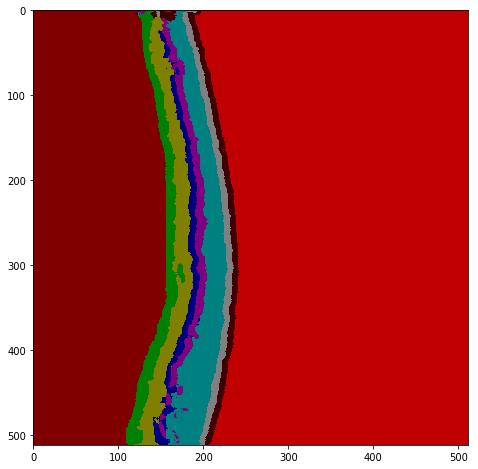

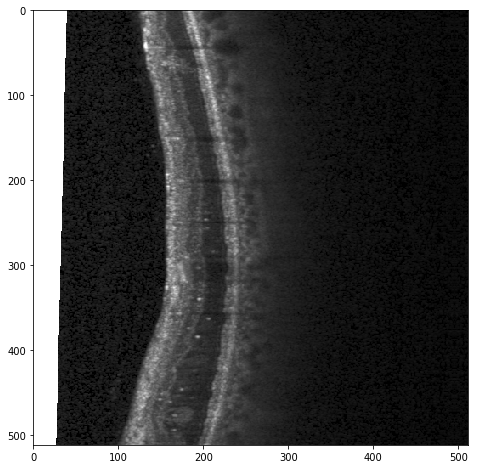

In [11]:
import matplotlib.pyplot as plt
import torch.nn.functional as F

relaynet_model =  torch.load('models/Exp01/relaynet_epoch20.model')
out = relaynet_model(Variable(torch.Tensor(test_data.X[12:13]).cuda(),volatile=True))
out = F.softmax(out,dim=1)
max_val, idx = torch.max(out,1)
idx = idx.data.cpu().numpy()
idx = label_img_to_rgb(idx)
plt.imshow(idx)
plt.show()

img_test = test_data.X[12:13]
img_test = np.squeeze(img_test)
plt.imshow(img_test)
plt.show()